# Introducción a Computer Vision con Python

## ¿Qué es Computer Vision?

**Computer Vision** (Visión por Computadora) es un campo de la inteligencia artificial que entrena a las computadoras para interpretar y comprender el mundo visual. Utilizando imágenes digitales de cámaras y videos, los algoritmos pueden identificar y clasificar objetos, e incluso reaccionar a lo que "ven".

### Aplicaciones principales:
-  Vehículos autónomos
-  Reconocimiento facial en smartphones
-  Diagnóstico médico por imágenes
-  Control de calidad en manufactura
-  Realidad aumentada y videojuegos

### Librerías que usaremos:
- **OpenCV**: Librería principal para procesamiento de imágenes
- **NumPy**: Para operaciones numéricas con arrays
- **Matplotlib**: Para visualización de imágenes

In [23]:
# Instalación de librerías necesarias
# Ejecuta esto si no tienes las librerías instaladas

# !pip install opencv-python
# !pip install numpy
# !pip install matplotlib

In [ ]:
# ============================================
# IMPORTACIÓN DE LIBRERÍAS NECESARIAS
# ============================================

# cv2 (OpenCV): Librería principal para procesamiento de imágenes y computer vision
# - Proporciona funciones para leer, escribir, manipular imágenes
# - Incluye algoritmos de detección, segmentación, transformaciones, etc.
import cv2

# numpy (np): Librería fundamental para computación científica en Python
# - Las imágenes se representan como arrays de NumPy (matrices numéricas)
# - Permite operaciones matemáticas eficientes sobre los píxeles
import numpy as np

# matplotlib.pyplot: Librería para visualización y creación de gráficos
# - plt.imshow() muestra imágenes en el notebook
# - plt.plot() crea gráficos, plt.subplots() maneja múltiples imágenes
import matplotlib.pyplot as plt

# matplotlib.rcParams: Parámetros de configuración de matplotlib
# - Permite personalizar el tamaño por defecto de las figuras
# - Controla aspectos visuales de los gráficos
from matplotlib import rcParams


# ============================================
# CONFIGURACIÓN DE VISUALIZACIÓN
# ============================================
# Establecer el tamaño por defecto de las figuras en matplotlib
# (12, 8) significa: 12 pulgadas de ancho x 8 pulgadas de alto
# Esto hace que las imágenes se vean más grandes y claras en el notebook
rcParams['figure.figsize'] = 12, 8


# ============================================
# VERIFICACIÓN DE INSTALACIÓN
# ============================================
# Imprimir mensaje de confirmación
print("✓ Librerías importadas correctamente")

# Mostrar la versión de OpenCV instalada
# cv2.__version__ obtiene el número de versión como string
# Útil para verificar compatibilidad y reproducibilidad
print(f"Versión de OpenCV: {cv2.__version__}")

## 1. Fundamentos: ¿Qué es una imagen digital?

Una imagen digital es una matriz (array) de números que representan los valores de intensidad de los píxeles.

### Tipos de imágenes:

1. **Escala de grises**: Matriz 2D (altura × ancho)
   - Cada píxel tiene un valor entre 0 (negro) y 255 (blanco)

2. **Color (RGB)**: Matriz 3D (altura × ancho × 3 canales)
   - Cada píxel tiene 3 valores: Red, Green, Blue
   - Cada canal va de 0 a 255

**Nota**: OpenCV usa el formato BGR (Blue, Green, Red) en lugar de RGB.

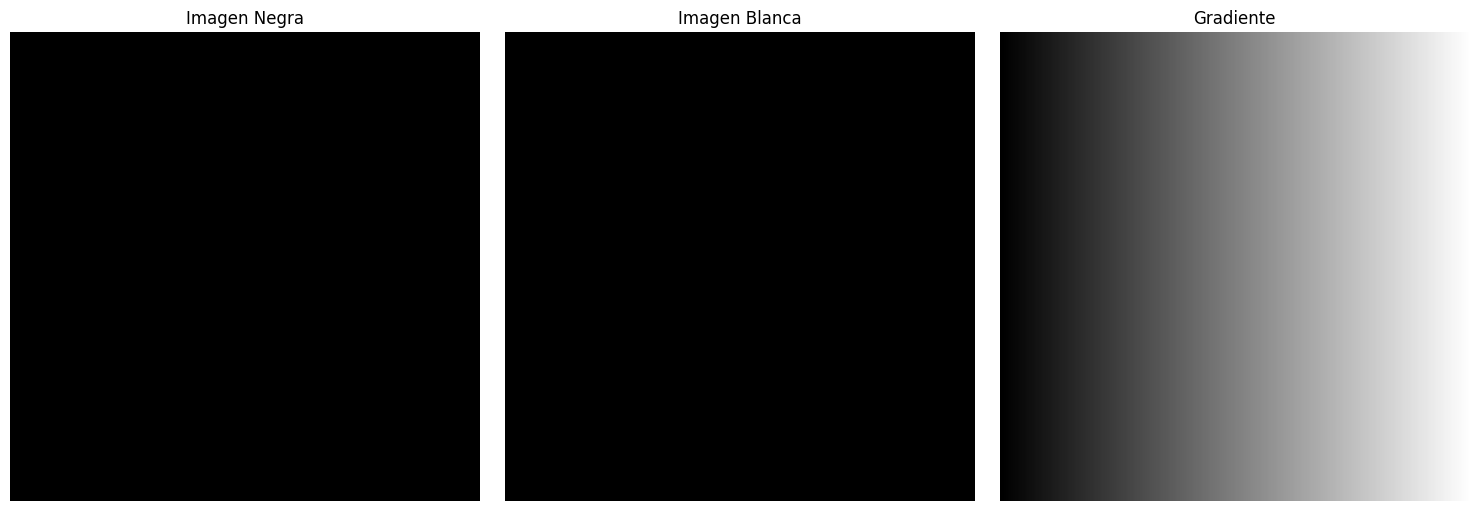

Forma de la imagen: (200, 200)
Tipo de datos: uint8


In [3]:
# Crear una imagen simple desde cero
# Creamos una imagen de 200x200 píxeles en escala de grises

# ============================================
# CREACIÓN DE IMAGEN COMPLETAMENTE NEGRA
# ============================================
# np.zeros() crea un array lleno de ceros
# (200, 200) define las dimensiones: 200 filas x 200 columnas (píxeles)
# dtype=np.uint8 especifica el tipo de dato: enteros sin signo de 8 bits (rango 0-255)
# En escala de grises: 0 = negro, 255 = blanco
imagen_negra = np.zeros((200, 200), dtype=np.uint8)


# ============================================
# CREACIÓN DE IMAGEN COMPLETAMENTE BLANCA
# ============================================
# np.ones() crea un array lleno de unos
# (200, 200) define las dimensiones de la imagen
# dtype=np.uint8 usa valores entre 0-255 (estándar para imágenes)
# Multiplicamos por 255 para convertir los 1s en 255s (blanco puro)
imagen_blanca = np.ones((200, 200), dtype=np.uint8) * 255


# ============================================
# CREACIÓN DE IMAGEN CON GRADIENTE HORIZONTAL
# ============================================
# PASO 1: Crear un array unidimensional con valores de 0 a 255
# np.linspace(0, 255, 200) genera 200 valores espaciados uniformemente
# desde 0 (negro) hasta 255 (blanco)
# dtype=np.uint8 asegura que los valores sean enteros en rango 0-255
imagen_gradiente = np.linspace(0, 255, 200, dtype=np.uint8)

# PASO 2: Replicar el array horizontalmente para crear la imagen 2D
# np.tile() repite el array 1D verticalmente 200 veces
# (200, 1) significa: repetir 200 veces en el eje vertical, 1 vez en horizontal
# Resultado: imagen de 200x200 píxeles con gradiente de izquierda (negro) a derecha (blanco)
imagen_gradiente = np.tile(imagen_gradiente, (200, 1))

# Visualizar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(imagen_negra, cmap='gray')
axes[0].set_title('Imagen Negra')
axes[0].axis('off')

axes[1].imshow(imagen_blanca, cmap='gray')
axes[1].set_title('Imagen Blanca')
axes[1].axis('off')

axes[2].imshow(imagen_gradiente, cmap='gray')
axes[2].set_title('Gradiente')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Forma de la imagen: {imagen_negra.shape}")
print(f"Tipo de datos: {imagen_negra.dtype}")

In [ ]:
# ============================================
# CREAR IMÁGENES RGB DE COLORES
# ============================================
# En OpenCV, las imágenes a color usan el formato BGR (Blue, Green, Red)
# Formato: (altura, ancho, 3) donde 3 representa los 3 canales de color


# ============================================
# CREAR IMAGEN ROJA
# ============================================
# PASO 1: Crear un lienzo negro de 200x200 píxeles con 3 canales
# np.zeros() inicializa todos los píxeles en [0, 0, 0] = negro
# (200, 200, 3): 200 filas, 200 columnas, 3 canales (B, G, R)
imagen_roja = np.zeros((200, 200, 3), dtype=np.uint8)

# PASO 2: Activar solo el canal ROJO
# [:, :, 2] significa: todas las filas, todas las columnas, canal índice 2 (Red)
# Los índices son: 0=Blue, 1=Green, 2=Red
# Asignamos 255 (máximo) al canal rojo, resultando en [0, 0, 255] = ROJO PURO
imagen_roja[:, :, 2] = 255


# ============================================
# CREAR IMAGEN VERDE
# ============================================
# PASO 1: Crear lienzo negro
imagen_verde = np.zeros((200, 200, 3), dtype=np.uint8)

# PASO 2: Activar solo el canal VERDE
# [:, :, 1] selecciona el canal índice 1 (Green)
# Resultado: [0, 255, 0] = VERDE PURO
imagen_verde[:, :, 1] = 255


# ============================================
# CREAR IMAGEN AZUL
# ============================================
# PASO 1: Crear lienzo negro
imagen_azul = np.zeros((200, 200, 3), dtype=np.uint8)

# PASO 2: Activar solo el canal AZUL
# [:, :, 0] selecciona el canal índice 0 (Blue)
# Resultado: [255, 0, 0] = AZUL PURO
imagen_azul[:, :, 0] = 255


# ============================================
# VISUALIZAR LAS TRES IMÁGENES
# ============================================
# plt.subplots() crea múltiples subgráficos en una cuadrícula
# (1, 3): 1 fila, 3 columnas de gráficos
# figsize=(15, 5): ancho 15 pulgadas, alto 5 pulgadas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# IMPORTANTE: matplotlib espera formato RGB, pero OpenCV usa BGR
# cv2.cvtColor() convierte entre espacios de color
# COLOR_BGR2RGB invierte el orden de los canales para visualización correcta

# Mostrar imagen roja
axes[0].imshow(cv2.cvtColor(imagen_roja, cv2.COLOR_BGR2RGB))
axes[0].set_title('Canal Rojo')  # Título del gráfico
axes[0].axis('off')  # Ocultar los ejes x e y

# Mostrar imagen verde
axes[1].imshow(cv2.cvtColor(imagen_verde, cv2.COLOR_BGR2RGB))
axes[1].set_title('Canal Verde')
axes[1].axis('off')

# Mostrar imagen azul
axes[2].imshow(cv2.cvtColor(imagen_azul, cv2.COLOR_BGR2RGB))
axes[2].set_title('Canal Azul')
axes[2].axis('off')

# tight_layout() ajusta automáticamente el espaciado entre subgráficos
plt.tight_layout()
# Mostrar todas las figuras
plt.show()


# ============================================
# INFORMACIÓN DE LA IMAGEN
# ============================================
# .shape devuelve las dimensiones del array
# Para imágenes RGB: (altura, ancho, canales)
print(f"Forma de imagen RGB: {imagen_roja.shape}")
# Output esperado: (200, 200, 3)

## 2. Carga y Manipulación de Imágenes

Para trabajar con imágenes reales, necesitamos:
1. Cargar la imagen desde un archivo
2. Convertir entre espacios de color
3. Redimensionar y recortar
4. Guardar los resultados

In [ ]:
# ============================================
# DEFINICIÓN DE FUNCIÓN AUXILIAR PARA VISUALIZACIÓN
# ============================================
# Esta función simplifica el proceso de mostrar imágenes de forma consistente
# Maneja automáticamente la conversión de BGR a RGB cuando es necesario

def mostrar_imagen(imagen, titulo="Imagen", cmap=None):
    """
    Función para mostrar imágenes de forma consistente
    
    Args:
        imagen: Array de NumPy con la imagen (puede ser BGR o escala de grises)
        titulo: Título para la imagen (string)
        cmap: Mapa de colores
              - None para imágenes RGB/BGR (a color)
              - 'gray' para imágenes en escala de grises
              - Otros: 'hot', 'jet', 'hsv', etc.
    """
    
    # ============================================
    # CREAR FIGURA DE MATPLOTLIB
    # ============================================
    # plt.figure() crea una nueva ventana/figura
    # figsize=(10, 6): ancho 10 pulgadas, alto 6 pulgadas
    plt.figure(figsize=(10, 6))
    
    
    # ============================================
    # CONVERSIÓN AUTOMÁTICA BGR -> RGB
    # ============================================
    # OpenCV usa BGR, matplotlib usa RGB
    # len(imagen.shape) == 3: verifica si tiene 3 dimensiones (imagen a color)
    # cmap is None: verifica que no se especificó escala de grises
    if len(imagen.shape) == 3 and cmap is None:
        # cv2.cvtColor() convierte entre espacios de color
        # COLOR_BGR2RGB invierte el orden: [B,G,R] -> [R,G,B]
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    
    
    # ============================================
    # MOSTRAR LA IMAGEN
    # ============================================
    # plt.imshow() muestra la imagen como un gráfico
    # imagen: array de píxeles a mostrar
    # cmap: mapa de colores (None usa los colores originales)
    plt.imshow(imagen, cmap=cmap)
    
    # plt.title() establece el título sobre la imagen
    plt.title(titulo)
    
    # plt.axis('off') oculta los ejes numéricos (x, y)
    # Hace que solo se vea la imagen sin coordenadas
    plt.axis('off')
    
    # plt.tight_layout() optimiza el uso del espacio
    # Ajusta márgenes para que todo quepa bien
    plt.tight_layout()
    
    # plt.show() renderiza y muestra la figura en el notebook
    plt.show()


# ============================================
# MENSAJE DE CONFIRMACIÓN
# ============================================
print("✓ Función auxiliar definida")
# La función ahora está lista para usarse en el resto del notebook

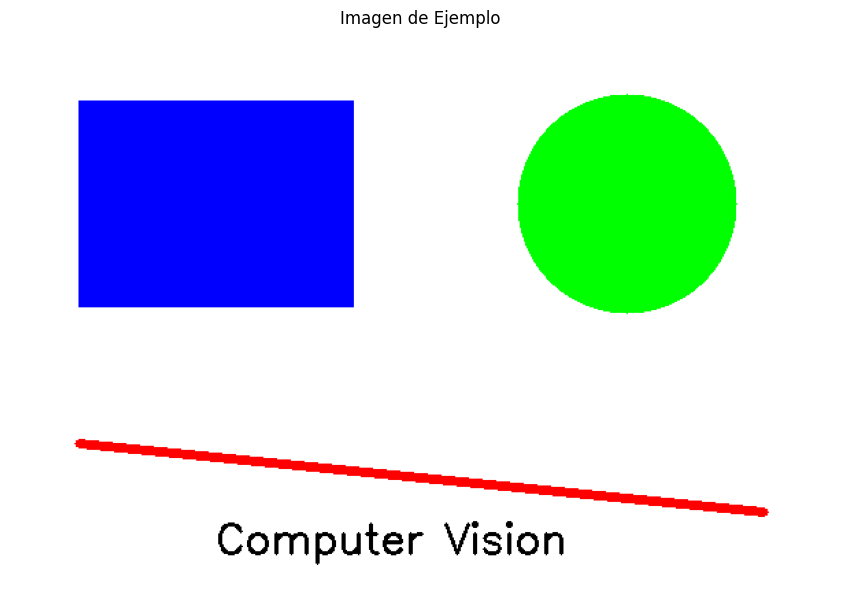

Dimensiones de la imagen: (400, 600, 3)
Alto: 400 píxeles
Ancho: 600 píxeles
Canales: 3


In [7]:
# Para este ejemplo, vamos a crear una imagen de muestra

# ============================================
# CREAR LIENZO BASE (IMAGEN EN BLANCO)
# ============================================
# np.ones() crea un array lleno de unos
# (400, 600, 3) define las dimensiones:
#   - 400 píxeles de alto
#   - 600 píxeles de ancho
#   - 3 canales de color (BGR: Blue, Green, Red - formato de OpenCV)
# dtype=np.uint8 especifica valores entre 0-255 (estándar para imágenes)
# Multiplicamos por 255 para obtener blanco puro en los 3 canales [255, 255, 255]
imagen_ejemplo = np.ones((400, 600, 3), dtype=np.uint8) * 255


# ============================================
# DIBUJAR UN RECTÁNGULO AZUL
# ============================================
# cv2.rectangle(imagen, punto_inicial, punto_final, color, grosor)
# (50, 50): coordenada superior izquierda (x=50, y=50)
# (250, 200): coordenada inferior derecha (x=250, y=200)
# (255, 0, 0): color en formato BGR (Azul=255, Verde=0, Rojo=0) = AZUL
# -1: grosor negativo indica relleno completo (sólido)
cv2.rectangle(imagen_ejemplo, (50, 50), (250, 200), (255, 0, 0), -1)


# ============================================
# DIBUJAR UN CÍRCULO VERDE
# ============================================
# cv2.circle(imagen, centro, radio, color, grosor)
# (450, 125): coordenadas del centro del círculo (x=450, y=125)
# 80: radio del círculo en píxeles
# (0, 255, 0): color en formato BGR (Azul=0, Verde=255, Rojo=0) = VERDE
# -1: grosor negativo para rellenar completamente el círculo
cv2.circle(imagen_ejemplo, (450, 125), 80, (0, 255, 0), -1)


# ============================================
# DIBUJAR UNA LÍNEA ROJA
# ============================================
# cv2.line(imagen, punto_inicio, punto_fin, color, grosor)
# (50, 300): coordenada inicial de la línea (x=50, y=300)
# (550, 350): coordenada final de la línea (x=550, y=350)
# (0, 0, 255): color en formato BGR (Azul=0, Verde=0, Rojo=255) = ROJO
# 5: grosor de la línea en píxeles
cv2.line(imagen_ejemplo, (50, 300), (550, 350), (0, 0, 255), 5)


# ============================================
# AGREGAR TEXTO A LA IMAGEN
# ============================================
# cv2.putText(imagen, texto, posición, fuente, escala, color, grosor)
# 'Computer Vision': texto que se mostrará
# (150, 380): posición de la esquina inferior izquierda del texto (x=150, y=380)
# cv2.FONT_HERSHEY_SIMPLEX: tipo de fuente (sans-serif normal)
# 1: escala de la fuente (tamaño relativo)
# (0, 0, 0): color en formato BGR (Azul=0, Verde=0, Rojo=0) = NEGRO
# 2: grosor del texto en píxeles
cv2.putText(imagen_ejemplo, 'Computer Vision', (150, 380), 
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

mostrar_imagen(imagen_ejemplo, "Imagen de Ejemplo")
print(f"Dimensiones de la imagen: {imagen_ejemplo.shape}")
print(f"Alto: {imagen_ejemplo.shape[0]} píxeles")
print(f"Ancho: {imagen_ejemplo.shape[1]} píxeles")
print(f"Canales: {imagen_ejemplo.shape[2]}")

In [ ]:
# ============================================
# CARGAR UNA IMAGEN REAL DESDE ARCHIVO
# ============================================
# Este ejemplo usa una imagen real guardada en el disco
# Es la forma más común de trabajar con Computer Vision


# ============================================
# LECTURA DE IMAGEN CON cv2.imread()
# ============================================
# cv2.imread() lee una imagen desde un archivo
# './imagen.jpg': ruta relativa al archivo de imagen
#   - './' significa: en el directorio actual
#   - Puede ser ruta absoluta: 'C:/Users/nombre/imagen.jpg'
#   - Formatos soportados: .jpg, .png, .bmp, .tiff, etc.
# Por defecto, lee la imagen en formato BGR (Blue, Green, Red)
# Si el archivo no existe, devuelve None
imagen_ejemplo = cv2.imread('./imagen.jpg')


# ============================================
# VISUALIZAR LA IMAGEN CARGADA
# ============================================
# Usamos nuestra función auxiliar definida anteriormente
# Automáticamente convierte de BGR a RGB para visualización correcta
mostrar_imagen(imagen_ejemplo, "Imagen de Ejemplo")


# ============================================
# INFORMACIÓN DETALLADA DE LA IMAGEN
# ============================================
# .shape devuelve una tupla con las dimensiones del array
# Para imágenes a color: (altura, ancho, canales)
print(f"Dimensiones de la imagen: {imagen_ejemplo.shape}")

# .shape[0]: número de filas (altura en píxeles)
print(f"Alto: {imagen_ejemplo.shape[0]} píxeles")

# .shape[1]: número de columnas (ancho en píxeles)
print(f"Ancho: {imagen_ejemplo.shape[1]} píxeles")

# .shape[2]: número de canales de color
# 3 canales = imagen a color (BGR)
# 1 canal = escala de grises
print(f"Canales: {imagen_ejemplo.shape[2]}")


# NOTA IMPORTANTE PARA LA CLASE:
# -----------------------------------------------------
# Si la imagen no existe en la ruta especificada:
# - cv2.imread() devuelve None
# - Esto causará un error al intentar usar la imagen
# - Siempre verificar que el archivo exista antes de continuar
# - Alternativa: usar la imagen sintética de la celda anterior

## 3. Conversión de Espacios de Color

Los espacios de color son diferentes formas de representar colores:

- **BGR/RGB**: Basado en los colores primarios de luz
- **Escala de grises**: Solo intensidad, sin información de color
- **HSV**: Hue (tono), Saturation (saturación), Value (valor)
  - Más intuitivo para segmentación por color
  - H: 0-179, S: 0-255, V: 0-255 en OpenCV

In [ ]:
# ============================================
# CONVERSIÓN A ESCALA DE GRISES
# ============================================
# La escala de grises elimina la información de color
# Cada píxel tiene un solo valor: intensidad de luz (0-255)
# - 0 = negro (sin luz)
# - 255 = blanco (máxima luz)
# - Valores intermedios = tonos de gris

# cv2.cvtColor() convierte entre espacios de color
# COLOR_BGR2GRAY: de Blue-Green-Red a escala de grises
# Usa una fórmula ponderada: Gray = 0.299*R + 0.587*G + 0.114*B
imagen_gris = cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2GRAY)


# ============================================
# CONVERSIÓN A ESPACIO HSV
# ============================================
# HSV = Hue (Tono), Saturation (Saturación), Value (Valor/Brillo)
# Es más intuitivo que RGB para el procesamiento de color:
# 
# - Hue (H): El color puro (0-179 en OpenCV)
#   * 0° = Rojo, 60° = Amarillo, 120° = Verde, 180° = Cian
# - Saturation (S): Intensidad del color (0-255)
#   * 0 = gris/blanco (sin color), 255 = color puro saturado
# - Value (V): Brillo del color (0-255)
#   * 0 = negro, 255 = máximo brillo
#
# Ventaja: Facilita la segmentación por color (ej: detectar todos los rojos)
imagen_hsv = cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2HSV)


# ============================================
# VISUALIZACIÓN DE LAS CONVERSIONES
# ============================================
# Crear cuadrícula de 2x2 subgráficos
# (2, 2): 2 filas, 2 columnas
# figsize=(14, 10): ancho 14 pulgadas, alto 10 pulgadas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# ============================================
# SUBGRÁFICO 1: IMAGEN ORIGINAL (RGB)
# ============================================
# axes[0, 0]: fila 0, columna 0 (superior izquierda)
axes[0, 0].imshow(cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original (RGB)')
axes[0, 0].axis('off')


# ============================================
# SUBGRÁFICO 2: ESCALA DE GRISES
# ============================================
# axes[0, 1]: fila 0, columna 1 (superior derecha)
# cmap='gray': mapa de colores de grises (0=negro, 255=blanco)
axes[0, 1].imshow(imagen_gris, cmap='gray')
axes[0, 1].set_title('Escala de Grises')
axes[0, 1].axis('off')


# ============================================
# SUBGRÁFICO 3: CANAL HUE (TONO) DE HSV
# ============================================
# axes[1, 0]: fila 1, columna 0 (inferior izquierda)
# imagen_hsv[:, :, 0]: todas las filas, todas las columnas, canal 0 (Hue)
# [:, :, 0] extrae solo el primer canal (el tono)
# cmap='hsv': mapa de colores que visualiza el espectro de tonos
axes[1, 0].imshow(imagen_hsv[:, :, 0], cmap='hsv')
axes[1, 0].set_title('HSV - Canal Hue (Tono)')
axes[1, 0].axis('off')


# ============================================
# SUBGRÁFICO 4: CANAL VALUE (BRILLO) DE HSV
# ============================================
# axes[1, 1]: fila 1, columna 1 (inferior derecha)
# imagen_hsv[:, :, 2]: canal 2 = Value (brillo)
# Los canales HSV son: 0=Hue, 1=Saturation, 2=Value
# cmap='gray': muestra el brillo como escala de grises
axes[1, 1].imshow(imagen_hsv[:, :, 2], cmap='gray')
axes[1, 1].set_title('HSV - Canal Value (Brillo)')
axes[1, 1].axis('off')


# ============================================
# AJUSTAR DISEÑO Y MOSTRAR
# ============================================
plt.tight_layout()  # Optimiza el espaciado entre subgráficos
plt.show()


# ============================================
# INFORMACIÓN DE LAS IMÁGENES CONVERTIDAS
# ============================================
# Imagen en grises: 2D (solo altura x ancho, sin canales)
print(f"Forma imagen en grises: {imagen_gris.shape}")
# Output esperado: (altura, ancho) - solo 2 dimensiones

# Imagen HSV: 3D (igual que BGR, pero diferentes canales)
print(f"Forma imagen HSV: {imagen_hsv.shape}")
# Output esperado: (altura, ancho, 3) - 3 canales H, S, V

## 4. Operaciones Básicas con Imágenes

### 4.1 Redimensionar Imágenes

Redimensionar es crucial para:
- Reducir el costo computacional
- Preparar datos para redes neuronales (que requieren tamaños fijos)
- Crear thumbnails

In [ ]:
# ============================================
# MÉTODO 1: REDIMENSIONAR A TAMAÑO ESPECÍFICO
# ============================================
# Especificar las dimensiones exactas deseadas en píxeles
nuevo_ancho = 300  # Ancho deseado en píxeles
nuevo_alto = 200   # Alto deseado en píxeles

# cv2.resize(imagen, (ancho, alto))
# IMPORTANTE: El orden es (ancho, alto), no (alto, ancho)
# Esto redimensiona la imagen al tamaño exacto especificado
imagen_redimensionada = cv2.resize(imagen_ejemplo, (nuevo_ancho, nuevo_alto))


# ============================================
# MÉTODO 2: REDIMENSIONAR CON FACTOR DE ESCALA
# ============================================
# Usar un factor multiplicador en lugar de dimensiones específicas
factor_escala = 0.5  # 0.5 = reducir a 50% del tamaño original

# cv2.resize() con factores de escala:
# - None: indica que no especificamos dimensiones exactas
# - fx: factor de escala en el eje X (ancho)
# - fy: factor de escala en el eje Y (alto)
# - interpolation: método para calcular los nuevos píxeles
#   * INTER_LINEAR: interpolación lineal (buena calidad, velocidad media)
imagen_escalada = cv2.resize(imagen_ejemplo, None, 
                             fx=factor_escala, fy=factor_escala, 
                             interpolation=cv2.INTER_LINEAR)


# ============================================
# MÉTODOS DE INTERPOLACIÓN: COMPARACIÓN
# ============================================
# La interpolación determina cómo se calculan los nuevos valores de píxeles
# al redimensionar. Diferentes métodos = diferentes resultados

# INTER_NEAREST: Vecino más cercano
# - Más rápido
# - Menor calidad (imagen pixelada)
# - Mejor para: imágenes con bordes duros, máscaras binarias
imagen_nearest = cv2.resize(imagen_ejemplo, (150, 100), 
                           interpolation=cv2.INTER_NEAREST)

# INTER_LINEAR: Interpolación bilineal
# - Velocidad media
# - Calidad media-buena
# - Mejor para: uso general, reducción de tamaño
imagen_linear = cv2.resize(imagen_ejemplo, (150, 100), 
                          interpolation=cv2.INTER_LINEAR)

# INTER_CUBIC: Interpolación bicúbica
# - Más lento
# - Mejor calidad (imagen más suave)
# - Mejor para: ampliación de imágenes, fotografías
imagen_cubic = cv2.resize(imagen_ejemplo, (150, 100), 
                         interpolation=cv2.INTER_CUBIC)


# ============================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================
# Crear cuadrícula de 2x2 subgráficos para comparar
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# SUBGRÁFICO 1: Imagen original
# axes[0, 0]: fila 0, columna 0 (superior izquierda)
axes[0, 0].imshow(cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2RGB))
# Mostrar dimensiones en el título usando slicing [:2] para obtener (alto, ancho)
axes[0, 0].set_title(f'Original {imagen_ejemplo.shape[:2]}')
axes[0, 0].axis('off')


# SUBGRÁFICO 2: Imagen redimensionada a tamaño específico
axes[0, 1].imshow(cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title(f'Redimensionada {imagen_redimensionada.shape[:2]}')
axes[0, 1].axis('off')


# SUBGRÁFICO 3: Interpolación NEAREST (vecino más cercano)
axes[1, 0].imshow(cv2.cvtColor(imagen_nearest, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('INTER_NEAREST (más rápido)')
axes[1, 0].axis('off')


# SUBGRÁFICO 4: Interpolación CUBIC (bicúbica)
axes[1, 1].imshow(cv2.cvtColor(imagen_cubic, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('INTER_CUBIC (mejor calidad)')
axes[1, 1].axis('off')


# ============================================
# AJUSTAR Y MOSTRAR
# ============================================
plt.tight_layout()  # Optimiza el espaciado
plt.show()


# NOTAS PARA LA CLASE:
# ========================================
# - INTER_NEAREST: Use para máscaras y cuando la velocidad es crítica
# - INTER_LINEAR: Use para la mayoría de casos (balance velocidad/calidad)
# - INTER_CUBIC: Use cuando la calidad visual es prioritaria
# - INTER_AREA: Mejor para reducir tamaño (shrinking)
# - El orden en resize es (ancho, alto), ¡no (alto, ancho)!

## 5. Filtros y Suavizado de Imágenes

Los filtros son operaciones que modifican los valores de los píxeles basándose en sus vecinos.

### Tipos de filtros comunes:

1. **Blur (Desenfoque)**: Reduce el ruido y suaviza la imagen
2. **Gaussian Blur**: Similar al blur pero con pesos gaussianos
3. **Median Blur**: Excelente para eliminar ruido "sal y pimienta"
4. **Bilateral Filter**: Suaviza pero preserva bordes

In [ ]:
# ============================================
# APLICAR DIFERENTES FILTROS DE SUAVIZADO
# ============================================
# Los filtros suavizan la imagen reduciendo el ruido y los detalles finos
# Se basan en reemplazar cada píxel con un promedio de sus vecinos


# ============================================
# FILTRO 1: BLUR PROMEDIO (AVERAGE BLUR)
# ============================================
# Reemplaza cada píxel con el promedio de sus vecinos
# kernel_size: tamaño de la ventana de vecindad
# (15, 15) significa una ventana de 15x15 píxeles
# DEBE ser un número IMPAR (3, 5, 7, 9, 11, 13, 15, etc.)
kernel_size = (15, 15)

# cv2.blur(imagen, tamaño_kernel)
# Calcula el promedio simple (sin pesos) de todos los píxeles en la ventana
# Cuanto mayor el kernel, más suavizado (pero más pérdida de detalles)
blur = cv2.blur(imagen_ejemplo, kernel_size)


# ============================================
# FILTRO 2: GAUSSIAN BLUR (DESENFOQUE GAUSSIANO)
# ============================================
# Similar al blur promedio, pero usa pesos gaussianos
# Los píxeles centrales tienen más peso que los periféricos
# Resultado: suavizado más natural, preserva mejor los bordes que blur promedio

# cv2.GaussianBlur(imagen, tamaño_kernel, sigmaX)
# - kernel_size: (15, 15) ventana de suavizado
# - 0: sigmaX (desviación estándar), 0 = se calcula automáticamente
# Produce un efecto más "natural" que el blur promedio
gaussian = cv2.GaussianBlur(imagen_ejemplo, kernel_size, 0)


# ============================================
# FILTRO 3: MEDIAN BLUR (DESENFOQUE POR MEDIANA)
# ============================================
# Reemplaza cada píxel con la MEDIANA (no el promedio) de sus vecinos
# Excelente para eliminar ruido "sal y pimienta" (píxeles blancos/negros aleatorios)
# Preserva mejor los bordes que blur promedio

# cv2.medianBlur(imagen, tamaño_kernel)
# - 15: tamaño del kernel (DEBE ser impar y UN SOLO número, no tupla)
# Ventaja: elimina ruido sin difuminar tanto los bordes
median = cv2.medianBlur(imagen_ejemplo, 15)


# ============================================
# FILTRO 4: BILATERAL FILTER (FILTRO BILATERAL)
# ============================================
# El filtro más sofisticado: suaviza PERO preserva bordes nítidos
# Considera tanto la distancia espacial como la diferencia de color
# Ideal para fotografías: reduce ruido manteniendo detalles importantes

# cv2.bilateralFilter(imagen, d, sigmaColor, sigmaSpace)
# - 15: diámetro de la vecindad de cada píxel
# - 75: sigmaColor (diferencia de color para considerar píxeles similares)
#   * Mayor valor = colores más diferentes se promedian juntos
# - 75: sigmaSpace (distancia espacial en coordenadas de píxeles)
#   * Mayor valor = píxeles más lejanos se influencian mutuamente
# MÁS LENTO que otros filtros, pero mejor calidad
bilateral = cv2.bilateralFilter(imagen_ejemplo, 15, 75, 75)


# ============================================
# VISUALIZACIÓN COMPARATIVA
# ============================================
# Crear cuadrícula de 2x3 para mostrar todas las variantes
fig, axes = plt.subplots(2, 3, figsize=(16, 10))


# FILA 1, COLUMNA 1: Imagen original
axes[0, 0].imshow(cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# FILA 1, COLUMNA 2: Blur promedio
axes[0, 1].imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Blur Promedio')
axes[0, 1].axis('off')

# FILA 1, COLUMNA 3: Gaussian blur
axes[0, 2].imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Gaussian Blur')
axes[0, 2].axis('off')

# FILA 2, COLUMNA 1: Median blur
axes[1, 0].imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Median Blur')
axes[1, 0].axis('off')

# FILA 2, COLUMNA 2: Bilateral filter
axes[1, 1].imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Bilateral Filter')
axes[1, 1].axis('off')


# ============================================
# VISUALIZACIÓN DE DIFERENCIA
# ============================================
# Mostrar qué fue eliminado por el filtro bilateral
# cv2.absdiff() calcula la diferencia absoluta píxel por píxel
# Píxeles diferentes = brillantes, píxeles iguales = oscuros
diferencia = cv2.absdiff(imagen_ejemplo, bilateral)

# FILA 2, COLUMNA 3: Diferencia (lo que se eliminó)
axes[1, 2].imshow(cv2.cvtColor(diferencia, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Diferencia (Original - Bilateral)')
axes[1, 2].axis('off')


# ============================================
# AJUSTAR Y MOSTRAR
# ============================================
plt.tight_layout()
plt.show()


# GUÍA DE SELECCIÓN DE FILTROS PARA LA CLASE:
# ====================================================
# - Blur Promedio: Suavizado rápido y simple
# - Gaussian Blur: Suavizado natural, uso general
# - Median Blur: Eliminar ruido sal y pimienta
# - Bilateral Filter: Reducir ruido preservando bordes (más lento)

## 6. Detección de Bordes

La detección de bordes es fundamental en Computer Vision. Los bordes representan cambios abruptos en la intensidad.

### Algoritmos principales:

1. **Sobel**: Detecta gradientes en dirección X e Y
2. **Canny**: El detector de bordes más popular
   - Usa múltiples etapas
   - Produce bordes delgados y bien definidos
3. **Laplacian**: Detecta cambios rápidos en intensidad

In [ ]:
# ============================================
# PREPARACIÓN: CONVERTIR A ESCALA DE GRISES
# ============================================
# La detección de bordes trabaja mejor en escala de grises
# Los bordes representan cambios bruscos en la intensidad de luz
# El color no es necesario y puede complicar el análisis
imagen_gris = cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2GRAY)


# ============================================
# MÉTODO 1: SOBEL - DETECTAR GRADIENTES
# ============================================
# Sobel detecta cambios de intensidad (gradientes) en direcciones X e Y
# Un gradiente grande = un borde
# Se aplica en dos direcciones separadas y luego se combinan

# Sobel en dirección X (detecta bordes verticales)
# cv2.Sobel(imagen, profundidad_output, dx, dy, tamaño_kernel)
# - cv2.CV_64F: profundidad de salida (float de 64 bits para valores negativos)
# - dx=1, dy=0: derivada de primer orden en X, cero en Y
# - ksize=5: tamaño del kernel Sobel (3, 5, 7, etc.)
# Resultado: detecta cambios horizontales (bordes verticales)
sobel_x = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=5)

# Sobel en dirección Y (detecta bordes horizontales)
# dx=0, dy=1: derivada en Y, cero en X
# Resultado: detecta cambios verticales (bordes horizontales)
sobel_y = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=5)

# Combinar gradientes X e Y usando magnitud vectorial
# cv2.magnitude() calcula: sqrt(sobel_x² + sobel_y²)
# Esto da la magnitud total del gradiente en cualquier dirección
sobel_combinado = cv2.magnitude(sobel_x, sobel_y)


# ============================================
# MÉTODO 2: LAPLACIAN - SEGUNDA DERIVADA
# ============================================
# Laplacian detecta cambios rápidos en intensidad (segunda derivada)
# Detecta regiones donde la intensidad cambia abruptamente
# Más sensible al ruido que Sobel

# cv2.Laplacian(imagen, profundidad_output)
# - cv2.CV_64F: permite valores negativos (importante para derivadas)
# Detecta bordes en todas las direcciones simultáneamente
laplacian = cv2.Laplacian(imagen_gris, cv2.CV_64F)


# ============================================
# MÉTODO 3: CANNY - DETECTOR DE BORDES ÓPTIMO
# ============================================
# Canny es el algoritmo más popular para detección de bordes
# Proceso multi-etapa:
# 1. Suavizado Gaussiano (reduce ruido)
# 2. Cálculo de gradientes
# 3. Supresión no-máxima (adelgaza bordes)
# 4. Umbralización por histéresis (usa dos umbrales)

# cv2.Canny(imagen, umbral_bajo, umbral_alto)
# - 50: threshold1 (umbral bajo)
#   * Píxeles con gradiente > 50 son "candidatos débiles"
# - 150: threshold2 (umbral alto)
#   * Píxeles con gradiente > 150 son "bordes seguros"
# - Píxeles entre 50-150: se incluyen solo si están conectados a bordes seguros
# Proporción recomendada: 1:2 o 1:3 (bajo:alto)
canny = cv2.Canny(imagen_gris, 50, 150)


# ============================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================
# Crear cuadrícula de 2x3 para comparar todos los métodos
fig, axes = plt.subplots(2, 3, figsize=(16, 10))


# FILA 1, COLUMNA 1: Imagen original en grises
axes[0, 0].imshow(imagen_gris, cmap='gray')
axes[0, 0].set_title('Imagen Original (Gris)')
axes[0, 0].axis('off')


# FILA 1, COLUMNA 2: Sobel X (bordes verticales)
# np.abs() convierte valores negativos a positivos para visualización
axes[0, 1].imshow(np.abs(sobel_x), cmap='gray')
axes[0, 1].set_title('Sobel X (Vertical)')
axes[0, 1].axis('off')


# FILA 1, COLUMNA 3: Sobel Y (bordes horizontales)
axes[0, 2].imshow(np.abs(sobel_y), cmap='gray')
axes[0, 2].set_title('Sobel Y (Horizontal)')
axes[0, 2].axis('off')


# FILA 2, COLUMNA 1: Sobel combinado (todas las direcciones)
axes[1, 0].imshow(sobel_combinado, cmap='gray')
axes[1, 0].set_title('Sobel Combinado')
axes[1, 0].axis('off')


# FILA 2, COLUMNA 2: Laplacian
axes[1, 1].imshow(np.abs(laplacian), cmap='gray')
axes[1, 1].set_title('Laplacian')
axes[1, 1].axis('off')


# FILA 2, COLUMNA 3: Canny (el mejor)
axes[1, 2].imshow(canny, cmap='gray')
axes[1, 2].set_title('Canny Edge Detection')
axes[1, 2].axis('off')


# ============================================
# AJUSTAR Y MOSTRAR
# ============================================
plt.tight_layout()
plt.show()


# GUÍA DE SELECCIÓN PARA LA CLASE:
# =========================================
# - Sobel: Útil cuando necesitas conocer la DIRECCIÓN del borde
# - Laplacian: Detecta cambios finos, pero sensible al ruido
# - Canny: MEJOR opción general - bordes limpios y precisos
# - Ajusta umbrales Canny: valores bajos → más bordes (+ ruido)
#                          valores altos → menos bordes (solo los fuertes)

## 7. Umbralización (Thresholding)

La umbralización convierte una imagen en escala de grises a una imagen binaria (blanco y negro).

### Tipos de umbralización:

1. **Simple**: Usa un valor fijo como umbral
2. **Adaptativa**: Calcula el umbral para pequeñas regiones
3. **Otsu**: Calcula automáticamente el umbral óptimo

In [ ]:
# ============================================
# MÉTODO 1: UMBRALIZACIÓN SIMPLE (BINARIA)
# ============================================
# Convierte imagen de grises a blanco y negro puro (binaria)
# Cada píxel se compara con un umbral fijo
# Si píxel >= umbral → blanco (255)
# Si píxel < umbral → negro (0)

umbral_valor = 127  # Valor de umbral (0-255), 127 = punto medio

# cv2.threshold(imagen, valor_umbral, valor_máximo, tipo)
# - imagen_gris: imagen de entrada en escala de grises
# - 127: umbral de comparación
# - 255: valor asignado a píxeles que pasan el umbral
# - cv2.THRESH_BINARY: tipo de umbralización binaria
# Retorna: (valor_umbral_usado, imagen_umbralizada)
_, thresh_simple = cv2.threshold(imagen_gris, umbral_valor, 255, cv2.THRESH_BINARY)


# ============================================
# MÉTODO 2: UMBRALIZACIÓN INVERSA
# ============================================
# Igual que binaria, pero invertida:
# Si píxel >= umbral → negro (0)
# Si píxel < umbral → blanco (255)

# THRESH_BINARY_INV: invierte el resultado
# Útil cuando queremos destacar objetos oscuros sobre fondo claro
_, thresh_inversa = cv2.threshold(imagen_gris, umbral_valor, 255, cv2.THRESH_BINARY_INV)


# ============================================
# MÉTODO 3: MÉTODO DE OTSU (AUTOMÁTICO)
# ============================================
# Otsu calcula automáticamente el MEJOR umbral
# Usa el histograma de la imagen para encontrar el valor óptimo
# que maximiza la varianza entre las clases (fondo y objeto)

# cv2.threshold() con THRESH_OTSU:
# - 0: valor umbral (se ignora, Otsu lo calcula automáticamente)
# - 255: valor máximo para píxeles que pasan el umbral
# - THRESH_BINARY + THRESH_OTSU: combina binaria con cálculo automático
# Ventaja: No necesitas saber qué umbral usar
_, thresh_otsu = cv2.threshold(imagen_gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# ============================================
# MÉTODO 4: UMBRALIZACIÓN ADAPTATIVA
# ============================================
# Calcula diferentes umbrales para diferentes regiones de la imagen
# Ideal para imágenes con iluminación NO UNIFORME
# En lugar de un umbral global, usa umbrales locales

# cv2.adaptiveThreshold(imagen, valor_máx, método, tipo, tamaño_bloque, constante)
# - imagen_gris: entrada en escala de grises
# - 255: valor máximo para píxeles umbralizados
# - ADAPTIVE_THRESH_GAUSSIAN_C: método de cálculo del umbral local
#   * Usa promedio ponderado gaussiano de la vecindad
#   * Alternativa: ADAPTIVE_THRESH_MEAN_C (promedio simple)
# - THRESH_BINARY: tipo de umbralización
# - 11: tamaño de la vecindad (área para calcular umbral local)
#   * Debe ser impar (3, 5, 7, 9, 11, etc.)
# - 2: constante C que se resta del promedio calculado
#   * Ajusta finamente el umbral (puede ser negativa)
thresh_adaptativa = cv2.adaptiveThreshold(imagen_gris, 255, 
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY, 11, 2)


# ============================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================
# Crear cuadrícula de 2x3 para comparar métodos
fig, axes = plt.subplots(2, 3, figsize=(16, 10))


# FILA 1, COLUMNA 1: Imagen original en grises
axes[0, 0].imshow(imagen_gris, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')


# FILA 1, COLUMNA 2: Umbralización simple
axes[0, 1].imshow(thresh_simple, cmap='gray')
axes[0, 1].set_title(f'Umbral Simple (threshold={umbral_valor})')
axes[0, 1].axis('off')


# FILA 1, COLUMNA 3: Umbralización inversa
axes[0, 2].imshow(thresh_inversa, cmap='gray')
axes[0, 2].set_title('Umbral Inverso')
axes[0, 2].axis('off')


# FILA 2, COLUMNA 1: Método de Otsu
axes[1, 0].imshow(thresh_otsu, cmap='gray')
axes[1, 0].set_title('Método de Otsu')
axes[1, 0].axis('off')


# FILA 2, COLUMNA 2: Umbralización adaptativa
axes[1, 1].imshow(thresh_adaptativa, cmap='gray')
axes[1, 1].set_title('Umbral Adaptativo')
axes[1, 1].axis('off')


# ============================================
# FILA 2, COLUMNA 3: HISTOGRAMA
# ============================================
# Visualizar la distribución de intensidades de píxeles
# Ayuda a entender por qué ciertos umbrales funcionan mejor

# .ravel() convierte la imagen 2D en un array 1D
# hist(datos, número_bins, rango)
# - imagen_gris.ravel(): todos los valores de píxeles en 1D
# - 256: número de bins (uno por cada valor 0-255)
# - [0, 256]: rango de valores a considerar
axes[1, 2].hist(imagen_gris.ravel(), 256, [0, 256])

# Dibujar línea vertical roja mostrando el umbral usado
# axvline() dibuja una línea vertical en x=umbral_valor
axes[1, 2].axvline(x=umbral_valor, color='r', linestyle='--', label='Umbral')

axes[1, 2].set_title('Histograma')
axes[1, 2].set_xlabel('Intensidad del píxel')  # Etiqueta eje X
axes[1, 2].set_ylabel('Frecuencia')  # Etiqueta eje Y
axes[1, 2].legend()  # Mostrar leyenda


# ============================================
# AJUSTAR Y MOSTRAR
# ============================================
plt.tight_layout()
plt.show()


# GUÍA DE SELECCIÓN PARA LA CLASE:
# =========================================
# - Simple: Cuando conoces el umbral ideal (ej: 127)
# - Inversa: Cuando quieres invertir el resultado
# - Otsu: MEJOR para imágenes con histograma bimodal (dos picos)
# - Adaptativa: MEJOR para iluminación irregular (sombras, gradientes)

## 8. Operaciones Morfológicas

Las operaciones morfológicas procesan imágenes basándose en formas. Se aplican típicamente a imágenes binarias.

### Operaciones principales:

1. **Erosión**: Reduce el tamaño de los objetos blancos
2. **Dilatación**: Aumenta el tamaño de los objetos blancos
3. **Apertura**: Erosión seguida de dilatación (elimina ruido pequeño)
4. **Cierre**: Dilatación seguida de erosión (rellena huecos pequeños)

In [ ]:
# ============================================
# PREPARACIÓN: USAR IMAGEN UMBRALIZADA
# ============================================
# Las operaciones morfológicas trabajan mejor con imágenes binarias
# Usamos la imagen umbralizada con Otsu de la celda anterior
# thresh_otsu ya está disponible: imagen en blanco y negro puro


# ============================================
# CREAR KERNEL (ELEMENTO ESTRUCTURANTE)
# ============================================
# El kernel define la forma y tamaño del "pincel" morfológico
# Es una matriz de unos que se desliza por la imagen

# np.ones((5, 5), np.uint8)
# - (5, 5): kernel cuadrado de 5x5 píxeles
# - np.uint8: tipo de datos entero sin signo de 8 bits
# Tamaños comunes: (3,3), (5,5), (7,7), (9,9)
# Cuanto mayor el kernel, mayor el efecto
kernel = np.ones((5, 5), np.uint8)


# ============================================
# OPERACIÓN 1: EROSIÓN
# ============================================
# Erosión "corroe" o reduce los objetos blancos
# Elimina píxeles de los bordes de los objetos
# Útil para: eliminar ruido pequeño, separar objetos conectados

# cv2.erode(imagen, kernel, iterations)
# - thresh_otsu: imagen binaria de entrada
# - kernel: elemento estructurante que define el área de erosión
# - iterations=1: número de veces que se aplica la erosión
#   * Más iteraciones = más erosión
# Cada píxel blanco se mantiene SOLO si todos los píxeles bajo el kernel son blancos
erosion = cv2.erode(thresh_otsu, kernel, iterations=1)


# ============================================
# OPERACIÓN 2: DILATACIÓN
# ============================================
# Dilatación "expande" o agranda los objetos blancos
# Añade píxeles a los bordes de los objetos
# Útil para: rellenar huecos pequeños, conectar objetos cercanos

# cv2.dilate(imagen, kernel, iterations)
# - iterations=1: número de veces que se aplica la dilatación
# Un píxel se vuelve blanco si AL MENOS UN píxel bajo el kernel es blanco
dilatacion = cv2.dilate(thresh_otsu, kernel, iterations=1)


# ============================================
# OPERACIÓN 3: APERTURA (OPENING)
# ============================================
# Apertura = Erosión seguida de Dilatación
# Efecto: elimina ruido pequeño FUERA de los objetos principales
# Secuencia:
#   1. Erosión elimina ruido pequeño
#   2. Dilatación restaura el tamaño de los objetos grandes

# cv2.morphologyEx(imagen, operación, kernel)
# - cv2.MORPH_OPEN: operación de apertura
# Equivale a: cv2.dilate(cv2.erode(thresh_otsu, kernel), kernel)
# Útil para limpiar fondos ruidosos
apertura = cv2.morphologyEx(thresh_otsu, cv2.MORPH_OPEN, kernel)


# ============================================
# OPERACIÓN 4: CIERRE (CLOSING)
# ============================================
# Cierre = Dilatación seguida de Erosión
# Efecto: rellena huecos pequeños DENTRO de los objetos
# Secuencia:
#   1. Dilatación rellena huecos
#   2. Erosión restaura el tamaño original

# cv2.MORPH_CLOSE: operación de cierre
# Equivale a: cv2.erode(cv2.dilate(thresh_otsu, kernel), kernel)
# Útil para conectar partes separadas de un mismo objeto
cierre = cv2.morphologyEx(thresh_otsu, cv2.MORPH_CLOSE, kernel)


# ============================================
# OPERACIÓN 5: GRADIENTE MORFOLÓGICO
# ============================================
# Gradiente = Dilatación - Erosión
# Efecto: extrae el CONTORNO (borde) de los objetos
# La diferencia entre la imagen dilatada y erosionada da solo los bordes

# cv2.MORPH_GRADIENT: operación de gradiente morfológico
# Equivale a: cv2.dilate(thresh_otsu) - cv2.erode(thresh_otsu)
# Útil para detectar solo los bordes de objetos
gradiente = cv2.morphologyEx(thresh_otsu, cv2.MORPH_GRADIENT, kernel)


# ============================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================
# Crear cuadrícula de 2x3 para comparar todas las operaciones
fig, axes = plt.subplots(2, 3, figsize=(16, 10))


# FILA 1, COLUMNA 1: Imagen original umbralizada
axes[0, 0].imshow(thresh_otsu, cmap='gray')
axes[0, 0].set_title('Original (Umbralizada)')
axes[0, 0].axis('off')


# FILA 1, COLUMNA 2: Erosión (reduce objetos)
axes[0, 1].imshow(erosion, cmap='gray')
axes[0, 1].set_title('Erosión')
axes[0, 1].axis('off')


# FILA 1, COLUMNA 3: Dilatación (expande objetos)
axes[0, 2].imshow(dilatacion, cmap='gray')
axes[0, 2].set_title('Dilatación')
axes[0, 2].axis('off')


# FILA 2, COLUMNA 1: Apertura (elimina ruido exterior)
axes[1, 0].imshow(apertura, cmap='gray')
axes[1, 0].set_title('Apertura (Opening)')
axes[1, 0].axis('off')


# FILA 2, COLUMNA 2: Cierre (rellena huecos interiores)
axes[1, 1].imshow(cierre, cmap='gray')
axes[1, 1].set_title('Cierre (Closing)')
axes[1, 1].axis('off')


# FILA 2, COLUMNA 3: Gradiente (solo bordes)
axes[1, 2].imshow(gradiente, cmap='gray')
axes[1, 2].set_title('Gradiente Morfológico')
axes[1, 2].axis('off')


# ============================================
# AJUSTAR Y MOSTRAR
# ============================================
plt.tight_layout()
plt.show()


# GUÍA DE SELECCIÓN PARA LA CLASE:
# =========================================
# - Erosión: Eliminar ruido pequeño, adelgazar objetos
# - Dilatación: Rellenar huecos, engrosar objetos
# - Apertura: Limpiar ruido FUERA de objetos (erosión + dilatación)
# - Cierre: Rellenar huecos DENTRO de objetos (dilatación + erosión)
# - Gradiente: Extraer solo los CONTORNOS de objetos
# 
# REGLA PRÁCTICA:
# - Fondo ruidoso → Apertura
# - Objeto con huecos → Cierre
# - Solo quiero bordes → Gradiente

## 9. Detección de Contornos

Los contornos son curvas que unen todos los puntos continuos (a lo largo del borde) que tienen el mismo color o intensidad.

### Aplicaciones:
- Detección de formas
- Reconocimiento de objetos
- Análisis de formas
- Conteo de objetos

In [ ]:
# ============================================
# ENCONTRAR CONTORNOS EN LA IMAGEN
# ============================================
# Los contornos son curvas que conectan puntos del mismo color/intensidad
# Esenciales para detección y análisis de formas

# cv2.findContours(imagen, modo_recuperación, método_aproximación)
# - thresh_otsu: imagen binaria (blanco y negro)
# - cv2.RETR_EXTERNAL: modo de recuperación
#   * Solo recupera contornos externos (ignora jerarquías internas)
#   * Alternativas: RETR_LIST (todos), RETR_TREE (con jerarquía)
# - cv2.CHAIN_APPROX_SIMPLE: método de aproximación
#   * Comprime contornos eliminando puntos redundantes
#   * Ej: un rectángulo usa solo 4 puntos (esquinas)
#   * Alternativa: CHAIN_APPROX_NONE (todos los puntos)
# Retorna: (contornos, jerarquía)
contornos, jerarquia = cv2.findContours(thresh_otsu, 
                                        cv2.RETR_EXTERNAL, 
                                        cv2.CHAIN_APPROX_SIMPLE)

# Mostrar cuántos contornos se encontraron
print(f"Número de contornos encontrados: {len(contornos)}")


# ============================================
# DIBUJAR TODOS LOS CONTORNOS
# ============================================
# Crear una copia de la imagen original para no modificarla
# .copy() crea una copia independiente en memoria
imagen_contornos = imagen_ejemplo.copy()

# cv2.drawContours(imagen, contornos, índice, color, grosor)
# - imagen_contornos: imagen donde dibujar
# - contornos: lista de contornos a dibujar
# - -1: índice del contorno (-1 = dibujar TODOS)
# - (0, 255, 0): color BGR (verde)
# - 3: grosor de la línea en píxeles
cv2.drawContours(imagen_contornos, contornos, -1, (0, 255, 0), 3)


# ============================================
# ANÁLISIS DETALLADO DE CONTORNOS
# ============================================
# Crear otra copia para análisis individual
imagen_analisis = imagen_ejemplo.copy()

# Iterar sobre cada contorno encontrado
# enumerate() da índice (i) y valor (contorno) de cada elemento
for i, contorno in enumerate(contornos):
    
    # --------------------------------------------
    # CÁLCULO DE ÁREA
    # --------------------------------------------
    # cv2.contourArea() calcula el área en píxeles²
    # Área = número de píxeles dentro del contorno
    area = cv2.contourArea(contorno)
    
    
    # --------------------------------------------
    # CÁLCULO DE PERÍMETRO
    # --------------------------------------------
    # cv2.arcLength() calcula la longitud del contorno
    # - contorno: puntos del contorno
    # - True: indica que el contorno es cerrado
    perimetro = cv2.arcLength(contorno, True)
    
    
    # --------------------------------------------
    # RECTÁNGULO DELIMITADOR (BOUNDING BOX)
    # --------------------------------------------
    # cv2.boundingRect() encuentra el rectángulo más pequeño
    # que contiene completamente el contorno
    # Retorna: (x, y, ancho, alto)
    # - x, y: coordenadas de la esquina superior izquierda
    # - w: ancho del rectángulo
    # - h: alto del rectángulo
    x, y, w, h = cv2.boundingRect(contorno)
    
    
    # --------------------------------------------
    # FILTRAR CONTORNOS PEQUEÑOS (RUIDO)
    # --------------------------------------------
    # Solo procesar contornos con área mayor a 1000 píxeles
    # Esto elimina ruido y contornos insignificantes
    if area > 1000:
        
        # Dibujar rectángulo delimitador
        # cv2.rectangle(imagen, punto1, punto2, color, grosor)
        # (x, y): esquina superior izquierda
        # (x+w, y+h): esquina inferior derecha
        # (255, 0, 0): color azul en BGR
        # 2: grosor de línea
        cv2.rectangle(imagen_analisis, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        
        # --------------------------------------------
        # CALCULAR EL CENTRO DEL CONTORNO (CENTROIDE)
        # --------------------------------------------
        # cv2.moments() calcula momentos estadísticos del contorno
        # Los momentos describen la forma y posición del contorno
        M = cv2.moments(contorno)
        
        # Verificar que m00 no sea cero (evitar división por cero)
        # m00 es el área del contorno
        if M["m00"] != 0:
            # Calcular coordenadas del centroide:
            # cx = m10 / m00  (momento en X / área)
            # cy = m01 / m00  (momento en Y / área)
            # int() convierte a entero para coordenadas de píxeles
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            
            
            # --------------------------------------------
            # DIBUJAR EL CENTRO
            # --------------------------------------------
            # cv2.circle(imagen, centro, radio, color, grosor)
            # (cx, cy): coordenadas del centro
            # 5: radio del círculo en píxeles
            # (0, 0, 255): color rojo en BGR
            # -1: grosor negativo = círculo relleno
            cv2.circle(imagen_analisis, (cx, cy), 5, (0, 0, 255), -1)
            
            
            # --------------------------------------------
            # AÑADIR ETIQUETA CON EL ÁREA
            # --------------------------------------------
            # cv2.putText(imagen, texto, posición, fuente, escala, color, grosor)
            # f'A:{int(area)}': texto formateado mostrando el área
            # (x, y-10): posición sobre el rectángulo
            # cv2.FONT_HERSHEY_SIMPLEX: fuente sans-serif estándar
            # 0.5: escala de la fuente (tamaño)
            # (255, 255, 0): color cian en BGR
            # 2: grosor del texto
            cv2.putText(imagen_analisis, f'A:{int(area)}', (x, y-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)


# ============================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================
# Crear cuadrícula de 1x3 para mostrar las tres etapas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# COLUMNA 1: Imagen umbralizada (entrada)
axes[0].imshow(thresh_otsu, cmap='gray')
axes[0].set_title('Imagen Umbralizada')
axes[0].axis('off')


# COLUMNA 2: Todos los contornos dibujados
axes[1].imshow(cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Contornos Detectados ({len(contornos)})')
axes[1].axis('off')


# COLUMNA 3: Análisis detallado con mediciones
axes[2].imshow(cv2.cvtColor(imagen_analisis, cv2.COLOR_BGR2RGB))
axes[2].set_title('Análisis de Contornos')
axes[2].axis('off')


# ============================================
# AJUSTAR Y MOSTRAR
# ============================================
plt.tight_layout()
plt.show()


# CONCEPTOS CLAVE PARA LA CLASE:
# =========================================
# - Contornos: curvas que definen los bordes de objetos
# - Área: tamaño del objeto en píxeles²
# - Perímetro: longitud del borde en píxeles
# - Bounding Box: rectángulo más pequeño que contiene el objeto
# - Centroide: punto central (centro de masa) del objeto
# - Momentos: propiedades estadísticas que describen la forma
#
# USOS PRÁCTICOS:
# - Contar objetos: len(contornos)
# - Clasificar por tamaño: filtrar por área
# - Tracking: seguir el centroide entre frames
# - Detección de formas: analizar relación área/perímetro

## 10. Detección de Características: Detección de Esquinas

Las esquinas son puntos donde hay cambios significativos en múltiples direcciones.

### Algoritmo de Harris Corner Detection:
- Detecta puntos de interés en una imagen
- Útil para tracking, reconocimiento de objetos, y reconstrucción 3D

In [ ]:
# ============================================
# PREPARACIÓN: CONVERTIR A FLOAT32
# ============================================
# El algoritmo de Harris requiere imagen en formato float32
# np.float32() convierte los valores de uint8 (0-255) a punto flotante
imagen_gris_float = np.float32(imagen_gris)


# ============================================
# MÉTODO 1: HARRIS CORNER DETECTION
# ============================================
# Harris detecta esquinas buscando cambios en intensidad en múltiples direcciones
# Una esquina tiene variación grande tanto en dirección X como Y

# cv2.cornerHarris(imagen, blockSize, ksize, k)
# - imagen_gris_float: imagen en escala de grises float32
# - blockSize=2: tamaño de vecindad considerada para detección de esquinas
#   * Ventana de 2x2 píxeles para cada punto
# - ksize=3: tamaño de apertura del operador Sobel
#   * Usado para calcular derivadas (gradientes)
#   * Debe ser impar: 3, 5, 7, etc.
# - k=0.04: parámetro libre del detector Harris (típico: 0.04-0.06)
#   * Controla la sensibilidad del detector
#   * k más pequeño = más esquinas detectadas
# Retorna: imagen con valores de "respuesta" de Harris en cada píxel
harris_corners = cv2.cornerHarris(imagen_gris_float, blockSize=2, ksize=3, k=0.04)


# ============================================
# DILATAR PARA MARCAR LAS ESQUINAS
# ============================================
# cv2.dilate() expande las regiones de esquinas detectadas
# Esto hace que las esquinas sean más visibles
# None: usa kernel por defecto
harris_corners = cv2.dilate(harris_corners, None)


# ============================================
# CREAR IMAGEN PARA VISUALIZACIÓN
# ============================================
# Hacer una copia de la imagen original para marcar esquinas
imagen_esquinas = imagen_ejemplo.copy()

# Marcar las esquinas en ROJO
# harris_corners > 0.01 * harris_corners.max(): umbralización
#   * Selecciona solo píxeles con respuesta Harris > 1% del máximo
#   * Esto filtra esquinas débiles, mantiene solo las fuertes
# [0, 0, 255]: color rojo en formato BGR
# Asigna rojo a todos los píxeles que son esquinas fuertes
imagen_esquinas[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]


# ============================================
# MÉTODO 2: SHI-TOMASI (GOOD FEATURES TO TRACK)
# ============================================
# Shi-Tomasi es una mejora de Harris, más moderna y precisa
# Optimizado para tracking de puntos entre frames de video
# También conocido como "Good Features to Track"

# cv2.goodFeaturesToTrack(imagen, maxCorners, qualityLevel, minDistance)
# - imagen_gris: imagen en escala de grises (uint8)
# - maxCorners=50: número máximo de esquinas a detectar
#   * Retorna las 50 mejores esquinas ordenadas por calidad
# - qualityLevel=0.01: calidad mínima de las esquinas (0-1)
#   * 0.01 = esquinas con calidad > 1% de la mejor esquina
#   * Valores más altos = menos esquinas pero de mejor calidad
# - minDistance=10: distancia mínima entre esquinas en píxeles
#   * Evita agrupar muchas esquinas en la misma región
#   * Distribuye las esquinas por toda la imagen
# Retorna: array de coordenadas (x, y) de las esquinas detectadas
esquinas_shi_tomasi = cv2.goodFeaturesToTrack(imagen_gris, 
                                               maxCorners=50, 
                                               qualityLevel=0.01, 
                                               minDistance=10)


# ============================================
# DIBUJAR ESQUINAS SHI-TOMASI
# ============================================
# Crear copia para visualizar Shi-Tomasi
imagen_shi_tomasi = imagen_ejemplo.copy()

# Verificar que se encontraron esquinas
if esquinas_shi_tomasi is not None:
    # Convertir coordenadas de float a enteros
    # np.int32() convierte para usar en funciones de dibujo
    esquinas_shi_tomasi = np.int32(esquinas_shi_tomasi)
    
    # Iterar sobre cada esquina detectada
    for esquina in esquinas_shi_tomasi:
        # .ravel() convierte [[x, y]] en [x, y] (aplana el array)
        x, y = esquina.ravel()
        
        # Dibujar un círculo verde en cada esquina
        # cv2.circle(imagen, centro, radio, color, grosor)
        # (x, y): coordenadas de la esquina
        # 5: radio del círculo en píxeles
        # (0, 255, 0): color verde en BGR
        # -1: grosor negativo = círculo relleno (sólido)
        cv2.circle(imagen_shi_tomasi, (x, y), 5, (0, 255, 0), -1)


# ============================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================
# Crear cuadrícula de 1x3 para comparar métodos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# COLUMNA 1: Imagen original
axes[0].imshow(cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')
axes[0].axis('off')


# COLUMNA 2: Harris Corner Detection (puntos rojos)
axes[1].imshow(cv2.cvtColor(imagen_esquinas, cv2.COLOR_BGR2RGB))
axes[1].set_title('Harris Corner Detection')
axes[1].axis('off')


# COLUMNA 3: Shi-Tomasi (círculos verdes)
# Mostrar número de esquinas detectadas en el título
axes[2].imshow(cv2.cvtColor(imagen_shi_tomasi, cv2.COLOR_BGR2RGB))
axes[2].set_title(f'Shi-Tomasi ({len(esquinas_shi_tomasi)} esquinas)')
axes[2].axis('off')


# ============================================
# AJUSTAR Y MOSTRAR
# ============================================
plt.tight_layout()
plt.show()


# CONCEPTOS CLAVE PARA LA CLASE:
# =========================================
# - Esquinas: puntos donde hay cambios significativos en múltiples direcciones
# - Son características importantes para:
#   * Tracking (seguimiento de objetos entre frames)
#   * Matching (encontrar correspondencias entre imágenes)
#   * Reconstrucción 3D
#   * SLAM (mapeo y localización simultáneos)
#
# COMPARACIÓN DE MÉTODOS:
# - Harris: Clásico, detecta muchas esquinas
#   * Puede dar muchos falsos positivos
#   * Bueno para entender el concepto
# - Shi-Tomasi: Más moderno y preciso
#   * Mejor para tracking
#   * Devuelve las N mejores esquinas
#   * Más usado en aplicaciones prácticas

## 11. Segmentación por Color

La segmentación por color permite extraer objetos de un color específico de una imagen.

### Proceso:
1. Convertir a espacio HSV (más fácil para definir rangos de color)
2. Definir rangos de color
3. Crear una máscara
4. Aplicar la máscara a la imagen original

In [ ]:
# ============================================
# CONVERTIR A ESPACIO DE COLOR HSV
# ============================================
# HSV es MUY superior a BGR/RGB para segmentación por color
# Razón: en HSV, el color (Hue) está separado del brillo (Value)
# Esto hace que sea más robusto ante cambios de iluminación
imagen_hsv = cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2HSV)


# ============================================
# DEFINIR RANGOS DE COLOR: AZUL
# ============================================
# Los rangos HSV definen qué píxeles consideramos "azules"
# En OpenCV, Hue va de 0-179 (no 0-360 como en estándar)

# Límite inferior del azul
# np.array([H, S, V])
# - H (Hue) = 100: tono azul en el espectro (azul está ~100-130)
# - S (Saturation) = 50: saturación mínima (50 = un poco saturado)
#   * 0 = gris/blanco (sin color), 255 = color puro
# - V (Value) = 50: brillo mínimo
#   * 0 = negro, 255 = máximo brillo
lower_blue = np.array([100, 50, 50])

# Límite superior del azul
# - H = 130: fin del rango azul
# - S = 255: máxima saturación permitida
# - V = 255: máximo brillo permitido
upper_blue = np.array([130, 255, 255])

# cv2.inRange(imagen_hsv, límite_inferior, límite_superior)
# Crea máscara binaria: 255 (blanco) donde el color está en el rango, 0 (negro) fuera
# Retorna: imagen binaria del mismo tamaño
mascara_azul = cv2.inRange(imagen_hsv, lower_blue, upper_blue)


# ============================================
# DEFINIR RANGOS DE COLOR: VERDE
# ============================================
# Verde en el espectro de Hue: aproximadamente 40-80

# Límite inferior del verde
# H = 40: inicio del verde en el espectro
lower_green = np.array([40, 50, 50])

# Límite superior del verde
# H = 80: fin del rango verde (antes de llegar a cian)
upper_green = np.array([80, 255, 255])

# Crear máscara para píxeles verdes
mascara_verde = cv2.inRange(imagen_hsv, lower_green, upper_green)


# ============================================
# DEFINIR RANGOS DE COLOR: ROJO (ESPECIAL)
# ============================================
# PROBLEMA: El rojo está en AMBOS extremos del espectro de Hue
# Hue es circular: 0° = rojo, 360° = rojo también
# En OpenCV: 0-10 es rojo Y 170-179 es rojo
# SOLUCIÓN: Necesitamos DOS rangos y combinarlos

# Rango 1: Rojo en valores bajos de Hue (0-10)
lower_red1 = np.array([0, 50, 50])   # Inicio del espectro
upper_red1 = np.array([10, 255, 255])
mascara_rojo1 = cv2.inRange(imagen_hsv, lower_red1, upper_red1)

# Rango 2: Rojo en valores altos de Hue (170-179)
lower_red2 = np.array([170, 50, 50])  # Final del espectro
upper_red2 = np.array([180, 255, 255])  # 180 es el máximo en OpenCV
mascara_rojo2 = cv2.inRange(imagen_hsv, lower_red2, upper_red2)

# Combinar ambas máscaras con OR lógico
# cv2.bitwise_or(): píxel = blanco si es blanco en CUALQUIERA de las máscaras
# Esto une ambos rangos de rojo en una sola máscara
mascara_rojo = cv2.bitwise_or(mascara_rojo1, mascara_rojo2)


# ============================================
# LIMPIAR MÁSCARAS CON MORFOLOGÍA
# ============================================
# Las máscaras suelen tener ruido (píxeles aislados)
# Usamos operaciones morfológicas para limpiarlas

# Crear kernel para operaciones morfológicas
kernel = np.ones((5, 5), np.uint8)

# Aplicar CIERRE seguido de APERTURA a la máscara azul
# - MORPH_CLOSE: rellena huecos pequeños DENTRO de objetos
#   * Dilatación + Erosión
# - MORPH_OPEN: elimina ruido pequeño FUERA de objetos
#   * Erosión + Dilatación
# Resultado: máscara más limpia y continua
mascara_azul = cv2.morphologyEx(mascara_azul, cv2.MORPH_CLOSE, kernel)
mascara_azul = cv2.morphologyEx(mascara_azul, cv2.MORPH_OPEN, kernel)


# ============================================
# APLICAR MÁSCARAS A LA IMAGEN ORIGINAL
# ============================================
# Extraer solo las regiones de color específico de la imagen original

# cv2.bitwise_and(imagen, imagen, mask=máscara)
# - imagen_ejemplo: imagen original a la que aplicar la máscara
# - imagen_ejemplo: segunda copia (necesaria por sintaxis de OpenCV)
# - mask: máscara binaria
# Resultado: imagen donde solo se ven los píxeles blancos de la máscara
#           el resto aparece negro
resultado_azul = cv2.bitwise_and(imagen_ejemplo, imagen_ejemplo, mask=mascara_azul)
resultado_verde = cv2.bitwise_and(imagen_ejemplo, imagen_ejemplo, mask=mascara_verde)
resultado_rojo = cv2.bitwise_and(imagen_ejemplo, imagen_ejemplo, mask=mascara_rojo)


# ============================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================
# Crear cuadrícula de 2x4 para mostrar todo el proceso
fig, axes = plt.subplots(2, 4, figsize=(18, 9))


# FILA 1, COLUMNA 1: Imagen original
axes[0, 0].imshow(cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen Original')
axes[0, 0].axis('off')


# FILA 1, COLUMNA 2-4: Máscaras binarias
axes[0, 1].imshow(mascara_azul, cmap='gray')
axes[0, 1].set_title('Máscara Azul')
axes[0, 1].axis('off')

axes[0, 2].imshow(mascara_verde, cmap='gray')
axes[0, 2].set_title('Máscara Verde')
axes[0, 2].axis('off')

axes[0, 3].imshow(mascara_rojo, cmap='gray')
axes[0, 3].set_title('Máscara Roja')
axes[0, 3].axis('off')


# FILA 2, COLUMNA 1: Canal Hue de HSV (para referencia)
# Muestra la distribución de tonos en la imagen
axes[1, 0].imshow(imagen_hsv[:, :, 0], cmap='hsv')
axes[1, 0].set_title('Canal Hue (Tono)')
axes[1, 0].axis('off')


# FILA 2, COLUMNA 2-4: Segmentaciones aplicadas
axes[1, 1].imshow(cv2.cvtColor(resultado_azul, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Segmentación Azul')
axes[1, 1].axis('off')

axes[1, 2].imshow(cv2.cvtColor(resultado_verde, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Segmentación Verde')
axes[1, 2].axis('off')

axes[1, 3].imshow(cv2.cvtColor(resultado_rojo, cv2.COLOR_BGR2RGB))
axes[1, 3].set_title('Segmentación Roja')
axes[1, 3].axis('off')


# ============================================
# AJUSTAR Y MOSTRAR
# ============================================
plt.tight_layout()
plt.show()


# GUÍA PARA LA CLASE - RANGOS HSV COMUNES:
# ==========================================
# Color      | Hue (H)  | Saturation (S) | Value (V)
# -----------|----------|----------------|------------
# Rojo       | 0-10,    | 50-255         | 50-255
#            | 170-180  |                |
# Naranja    | 10-25    | 50-255         | 50-255
# Amarillo   | 25-35    | 50-255         | 50-255
# Verde      | 35-85    | 50-255         | 50-255
# Azul       | 85-130   | 50-255         | 50-255
# Violeta    | 130-160  | 50-255         | 50-255
#
# CONSEJOS:
# - S bajo (0-50): colores muy desaturados (grises)
# - V bajo (0-50): colores muy oscuros
# - Ajusta rangos según iluminación de tu imagen específica
# - Usa trackbars para encontrar rangos óptimos interactivamente

## 12. Transformaciones Geométricas

Las transformaciones geométricas modifican la geometría de la imagen.

### Tipos principales:
1. **Traslación**: Mover la imagen
2. **Rotación**: Girar la imagen
3. **Escalado**: Cambiar el tamaño
4. **Transformación Afín**: Combinación de las anteriores
5. **Transformación Perspectiva**: Cambios de perspectiva

In [ ]:
# ============================================
# OBTENER DIMENSIONES DE LA IMAGEN
# ============================================
# Extraer alto y ancho de la imagen para cálculos posteriores
# .shape retorna (alto, ancho, canales)
# [:2] selecciona solo los primeros dos valores (alto, ancho)
alto, ancho = imagen_ejemplo.shape[:2]


# ============================================
# TRANSFORMACIÓN 1: TRASLACIÓN (DESPLAZAMIENTO)
# ============================================
# Mover la imagen a una nueva posición sin rotarla ni cambiar su tamaño

# Crear matriz de transformación afín para traslación
# Matriz 2x3: [[1, 0, tx],
#              [0, 1, ty]]
# - tx = 100: desplazamiento en X (píxeles a la derecha)
# - ty = 50: desplazamiento en Y (píxeles hacia abajo)
# np.float32() crea un array de punto flotante
matriz_traslacion = np.float32([[1, 0, 100], [0, 1, 50]])

# cv2.warpAffine(imagen, matriz_transformación, (ancho, alto))
# - imagen_ejemplo: imagen a transformar
# - matriz_traslacion: matriz 2x3 que define la transformación
# - (ancho, alto): tamaño de la imagen de salida
# Aplica la transformación a cada píxel de la imagen
imagen_trasladada = cv2.warpAffine(imagen_ejemplo, matriz_traslacion, (ancho, alto))


# ============================================
# TRANSFORMACIÓN 2: ROTACIÓN
# ============================================
# Rotar la imagen alrededor de un punto central

# Calcular el centro de la imagen
# // es división entera (sin decimales)
centro = (ancho // 2, alto // 2)

# Parámetros de rotación
angulo = 45    # Grados a rotar (positivo = antihorario, negativo = horario)
escala = 1.0   # Factor de escala (1.0 = tamaño original, 0.5 = mitad, 2.0 = doble)

# cv2.getRotationMatrix2D(centro, ángulo, escala)
# Calcula la matriz de transformación 2x3 para rotación
# - centro: punto alrededor del cual rotar
# - angulo: grados de rotación (antihorario)
# - escala: factor de zoom simultáneo
# Retorna: matriz de transformación afín
matriz_rotacion = cv2.getRotationMatrix2D(centro, angulo, escala)

# Aplicar la rotación usando warpAffine
imagen_rotada = cv2.warpAffine(imagen_ejemplo, matriz_rotacion, (ancho, alto))


# ============================================
# TRANSFORMACIÓN 3: ESCALADO (CAMBIO DE TAMAÑO)
# ============================================
# Redimensionar la imagen a un porcentaje del tamaño original

# cv2.resize(imagen, tamaño, fx, fy, interpolación)
# - None: no especificamos tamaño absoluto, usamos factores
# - fx=0.7: factor de escala en X (70% del ancho original)
# - fy=0.7: factor de escala en Y (70% del alto original)
# - INTER_LINEAR: método de interpolación bilineal (buena calidad/velocidad)
imagen_escalada = cv2.resize(imagen_ejemplo, None, fx=0.7, fy=0.7, 
                             interpolation=cv2.INTER_LINEAR)


# ============================================
# TRANSFORMACIÓN 4: VOLTEAR (FLIP)
# ============================================
# Reflejar la imagen como en un espejo

# cv2.flip(imagen, flip_code)
# flip_code determina el tipo de volteo:
# - 1: volteo horizontal (espejo izquierda-derecha)
# - 0: volteo vertical (espejo arriba-abajo)
# - -1: volteo en ambos ejes (rotación 180°)
imagen_flip_horizontal = cv2.flip(imagen_ejemplo, 1)
imagen_flip_vertical = cv2.flip(imagen_ejemplo, 0)


# ============================================
# TRANSFORMACIÓN 5: TRANSFORMACIÓN PERSPECTIVA
# ============================================
# Cambia la perspectiva como si vieras la imagen desde otro ángulo
# Útil para corregir distorsión de cámara o simular vista en 3D

# Definir 4 puntos en la imagen ORIGINAL
# Estos son las esquinas de un cuadrilátero en la imagen actual
# Formato: [[x, y], [x, y], [x, y], [x, y]]
# np.float32() convierte a tipo requerido por la función
puntos_origen = np.float32([[50, 50],     # Superior izquierda
                            [550, 50],    # Superior derecha
                            [50, 350],    # Inferior izquierda
                            [550, 350]])  # Inferior derecha

# Definir dónde queremos que esos 4 puntos aparezcan en la imagen TRANSFORMADA
# Aquí creamos un efecto de perspectiva trapezoidal
puntos_destino = np.float32([[0, 0],      # Nueva posición punto 1
                             [600, 0],    # Nueva posición punto 2
                             [100, 400],  # Nueva posición punto 3 (movido a la derecha)
                             [500, 400]]) # Nueva posición punto 4 (movido a la izquierda)

# cv2.getPerspectiveTransform(puntos_origen, puntos_destino)
# Calcula la matriz de transformación perspectiva 3x3
# que mapea los 4 puntos origen a los 4 puntos destino
matriz_perspectiva = cv2.getPerspectiveTransform(puntos_origen, puntos_destino)

# cv2.warpPerspective(imagen, matriz, tamaño_salida)
# Aplica transformación perspectiva (requiere matriz 3x3)
# Similar a warpAffine pero permite transformaciones más complejas
imagen_perspectiva = cv2.warpPerspective(imagen_ejemplo, matriz_perspectiva, 
                                         (ancho, alto))


# ============================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================
# Crear cuadrícula de 2x4 para mostrar todas las transformaciones
fig, axes = plt.subplots(2, 4, figsize=(18, 9))


# FILA 1, COLUMNA 1: Imagen original
axes[0, 0].imshow(cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')


# FILA 1, COLUMNA 2: Traslación
axes[0, 1].imshow(cv2.cvtColor(imagen_trasladada, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Traslación')
axes[0, 1].axis('off')


# FILA 1, COLUMNA 3: Rotación
axes[0, 2].imshow(cv2.cvtColor(imagen_rotada, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title(f'Rotación {angulo}°')
axes[0, 2].axis('off')


# FILA 1, COLUMNA 4: Escalado
axes[0, 3].imshow(cv2.cvtColor(imagen_escalada, cv2.COLOR_BGR2RGB))
axes[0, 3].set_title('Escalado 70%')
axes[0, 3].axis('off')


# FILA 2, COLUMNA 1: Flip horizontal
axes[1, 0].imshow(cv2.cvtColor(imagen_flip_horizontal, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Flip Horizontal')
axes[1, 0].axis('off')


# FILA 2, COLUMNA 2: Flip vertical
axes[1, 1].imshow(cv2.cvtColor(imagen_flip_vertical, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Flip Vertical')
axes[1, 1].axis('off')


# FILA 2, COLUMNA 3: Transformación perspectiva
axes[1, 2].imshow(cv2.cvtColor(imagen_perspectiva, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Transformación Perspectiva')
axes[1, 2].axis('off')


# ============================================
# COMBINACIÓN DE TRANSFORMACIONES
# ============================================
# Ejemplo: aplicar múltiples transformaciones secuencialmente
# Primero escalar, luego rotar

# Paso 1: Escalar al 80%
imagen_combo = cv2.resize(imagen_ejemplo, None, fx=0.8, fy=0.8)

# Obtener nuevo tamaño después de escalar
h, w = imagen_combo.shape[:2]

# Paso 2: Rotar 30 grados alrededor del nuevo centro
M = cv2.getRotationMatrix2D((w//2, h//2), 30, 1.0)
imagen_combo = cv2.warpAffine(imagen_combo, M, (w, h))

# FILA 2, COLUMNA 4: Transformación combinada
axes[1, 3].imshow(cv2.cvtColor(imagen_combo, cv2.COLOR_BGR2RGB))
axes[1, 3].set_title('Combinado: Escala + Rotación')
axes[1, 3].axis('off')


# ============================================
# AJUSTAR Y MOSTRAR
# ============================================
plt.tight_layout()
plt.show()


# GUÍA PARA LA CLASE:
# =========================================
# TRANSFORMACIONES AFINES (warpAffine):
# - Traslación: mover imagen
# - Rotación: girar alrededor de un punto
# - Escalado: cambiar tamaño
# - Volteo: reflejo espejo
# Matriz 2x3, preserva líneas paralelas
#
# TRANSFORMACIÓN PERSPECTIVA (warpPerspective):
# - Cambia perspectiva/punto de vista
# - Matriz 3x3, NO preserva líneas paralelas
# - Útil para: corrección de distorsión, vista aérea
#
# USOS PRÁCTICOS:
# - Data augmentation en ML (entrenar con imágenes transformadas)
# - Corrección de orientación de documentos escaneados
# - Estabilización de video
# - Realidad aumentada

## 13. Proyecto Final: Sistema Completo de Análisis de Imagen

Vamos a crear una función que combine múltiples técnicas de Computer Vision para analizar una imagen de forma completa.

In [ ]:
# ============================================
# FUNCIÓN DE ANÁLISIS COMPLETO DE IMAGEN
# ============================================
# Esta función integra TODAS las técnicas aprendidas en el notebook
# Realiza un análisis exhaustivo de cualquier imagen

def analizar_imagen_completo(imagen):
    """
    Análisis completo de una imagen usando múltiples técnicas de Computer Vision
    
    Args:
        imagen: Imagen en formato BGR de OpenCV (array de NumPy)
    
    Returns:
        resultados: Diccionario con todas las métricas calculadas
        gris: Imagen en escala de grises
        bordes: Imagen con bordes detectados (Canny)
        umbral: Imagen umbralizada (binaria)
        contornos: Lista de contornos detectados
    """
    
    # Diccionario para almacenar todos los resultados
    resultados = {}
    
    
    # ============================================
    # ETAPA 1: INFORMACIÓN BÁSICA
    # ============================================
    # Obtener dimensiones y propiedades fundamentales de la imagen
    
    # .shape devuelve (alto, ancho, canales)
    resultados['dimensiones'] = imagen.shape
    resultados['alto'] = imagen.shape[0]   # Número de filas (píxeles verticales)
    resultados['ancho'] = imagen.shape[1]  # Número de columnas (píxeles horizontales)
    
    # Detectar si es imagen a color o escala de grises
    # len(imagen.shape) == 3 significa que tiene 3 dimensiones (incluye canales)
    resultados['canales'] = imagen.shape[2] if len(imagen.shape) == 3 else 1
    
    
    # ============================================
    # ETAPA 2: CONVERSIÓN A ESCALA DE GRISES
    # ============================================
    # Necesaria para muchos análisis posteriores
    
    # Verificar si la imagen es a color o ya está en grises
    if len(imagen.shape) == 3:
        # Imagen a color → convertir a grises
        gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    else:
        # Ya está en grises → solo copiar
        gris = imagen.copy()
    
    
    # ============================================
    # ETAPA 3: ESTADÍSTICAS DE INTENSIDAD
    # ============================================
    # Analizar la distribución de valores de píxeles
    
    # np.mean(): promedio de todos los valores de píxeles
    # Indica el brillo general de la imagen (0-255)
    resultados['brillo_promedio'] = np.mean(gris)
    
    # np.std(): desviación estándar de los valores
    # Indica el contraste: valores altos = mucha variación (buen contraste)
    resultados['brillo_std'] = np.std(gris)
    
    # np.min(): valor mínimo (píxel más oscuro)
    resultados['brillo_min'] = np.min(gris)
    
    # np.max(): valor máximo (píxel más brillante)
    resultados['brillo_max'] = np.max(gris)
    
    
    # ============================================
    # ETAPA 4: DETECCIÓN DE BORDES (CANNY)
    # ============================================
    # Identificar dónde hay cambios bruscos de intensidad
    
    # Aplicar el detector de bordes Canny
    # Umbrales 50-150: estándar para la mayoría de imágenes
    bordes = cv2.Canny(gris, 50, 150)
    
    # Calcular qué porcentaje de la imagen son bordes
    # np.sum(bordes > 0): contar píxeles blancos (bordes)
    # bordes.size: total de píxeles en la imagen
    # * 100: convertir a porcentaje
    resultados['porcentaje_bordes'] = (np.sum(bordes > 0) / bordes.size) * 100
    
    
    # ============================================
    # ETAPA 5: UMBRALIZACIÓN (OTSU)
    # ============================================
    # Convertir a imagen binaria (blanco y negro)
    
    # cv2.threshold() con método de Otsu (calcula umbral automáticamente)
    # _ : ignoramos el valor del umbral calculado
    # umbral: imagen binaria resultante
    _, umbral = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Calcular porcentaje de píxeles blancos
    # Útil para entender la distribución claro/oscuro
    resultados['porcentaje_blancos'] = (np.sum(umbral == 255) / umbral.size) * 100
    
    
    # ============================================
    # ETAPA 6: DETECCIÓN DE CONTORNOS
    # ============================================
    # Encontrar y contar objetos en la imagen
    
    # Detectar contornos externos en la imagen umbralizada
    # RETR_EXTERNAL: solo contornos externos (sin jerarquías)
    # CHAIN_APPROX_SIMPLE: comprimir contornos eliminando puntos redundantes
    contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Contar número de objetos detectados
    resultados['num_objetos'] = len(contornos)
    
    
    # ============================================
    # ETAPA 7: ANÁLISIS DE CONTORNOS SIGNIFICATIVOS
    # ============================================
    # Calcular estadísticas sobre los objetos detectados
    
    # Calcular área de cada contorno, filtrando los muy pequeños (ruido)
    # cv2.contourArea(c): área en píxeles² del contorno c
    # if cv2.contourArea(c) > 100: solo contornos con área > 100 píxeles
    areas = [cv2.contourArea(c) for c in contornos if cv2.contourArea(c) > 100]
    
    # Verificar que hay al menos un objeto significativo
    if areas:
        # np.mean(areas): promedio de las áreas
        # Indica el tamaño típico de los objetos
        resultados['area_promedio_objetos'] = np.mean(areas)
        
        # np.max(areas): área del objeto más grande
        resultados['area_mayor_objeto'] = np.max(areas)
    else:
        # No hay objetos significativos
        resultados['area_promedio_objetos'] = 0
        resultados['area_mayor_objeto'] = 0
    
    
    # ============================================
    # ETAPA 8: DETECCIÓN DE ESQUINAS
    # ============================================
    # Encontrar puntos de interés (características)
    
    # cv2.goodFeaturesToTrack(): detecta esquinas usando Shi-Tomasi
    # maxCorners=100: detectar hasta 100 esquinas
    # qualityLevel=0.01: calidad mínima 1% de la mejor esquina
    # minDistance=10: separación mínima de 10 píxeles entre esquinas
    esquinas = cv2.goodFeaturesToTrack(gris, maxCorners=100, 
                                       qualityLevel=0.01, minDistance=10)
    
    # Contar esquinas detectadas
    # if esquinas is not None: verificar que se encontraron esquinas
    # len(esquinas): número de esquinas
    resultados['num_esquinas'] = len(esquinas) if esquinas is not None else 0
    
    
    # ============================================
    # ETAPA 9: ANÁLISIS DE COLOR (SI ES IMAGEN A COLOR)
    # ============================================
    # Analizar la distribución de colores en espacio HSV
    
    # Solo aplicar si la imagen tiene 3 canales (color)
    if len(imagen.shape) == 3:
        # Convertir a HSV para análisis de color
        hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
        
        # Analizar el canal Hue (tono/color)
        # np.median(): valor mediano (más robusto que el promedio)
        # hsv[:, :, 0]: canal Hue (índice 0)
        # Indica el color dominante en la imagen
        resultados['tono_dominante'] = np.median(hsv[:, :, 0])
        
        # Analizar el canal Saturation (intensidad del color)
        # np.mean(): promedio de saturación
        # Valores altos = colores vívidos, valores bajos = colores apagados
        resultados['saturacion_promedio'] = np.mean(hsv[:, :, 1])
        
        # Analizar el canal Value (brillo)
        # np.mean(): promedio de brillo
        # Similar a brillo_promedio pero en espacio HSV
        resultados['valor_promedio'] = np.mean(hsv[:, :, 2])
    
    
    # ============================================
    # RETORNAR TODOS LOS RESULTADOS
    # ============================================
    # Devolver diccionario con métricas e imágenes procesadas
    return resultados, gris, bordes, umbral, contornos


# ============================================
# APLICAR ANÁLISIS A NUESTRA IMAGEN
# ============================================
# Llamar a la función con la imagen de ejemplo
resultados, gris, bordes, umbral, contornos = analizar_imagen_completo(imagen_ejemplo)


# ============================================
# VISUALIZAR CONTORNOS EN LA IMAGEN ORIGINAL
# ============================================
# Dibujar todos los contornos detectados sobre la imagen original
imagen_analizada = imagen_ejemplo.copy()

# Dibujar contornos en verde, grosor 2 píxeles
cv2.drawContours(imagen_analizada, contornos, -1, (0, 255, 0), 2)


# ============================================
# CREAR VISUALIZACIÓN COMPLETA
# ============================================
# Mostrar imagen original y los 3 pasos principales del análisis
fig, axes = plt.subplots(2, 3, figsize=(16, 10))


# FILA 1, COLUMNA 1: Imagen original
axes[0, 0].imshow(cv2.cvtColor(imagen_ejemplo, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen Original')
axes[0, 0].axis('off')


# FILA 1, COLUMNA 2: Escala de grises
axes[0, 1].imshow(gris, cmap='gray')
axes[0, 1].set_title('Escala de Grises')
axes[0, 1].axis('off')


# FILA 1, COLUMNA 3: Bordes detectados
# Mostrar porcentaje de bordes en el título
axes[0, 2].imshow(bordes, cmap='gray')
axes[0, 2].set_title(f'Bordes ({resultados["porcentaje_bordes"]:.2f}% de la imagen)')
axes[0, 2].axis('off')


# FILA 2, COLUMNA 1: Umbralización
axes[1, 0].imshow(umbral, cmap='gray')
axes[1, 0].set_title('Umbralización (Otsu)')
axes[1, 0].axis('off')


# FILA 2, COLUMNA 2: Contornos detectados
axes[1, 1].imshow(cv2.cvtColor(imagen_analizada, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title(f'Contornos Detectados ({resultados["num_objetos"]})')
axes[1, 1].axis('off')


# ============================================
# FILA 2, COLUMNA 3: PANEL DE ESTADÍSTICAS
# ============================================
# Crear un panel de texto con todas las métricas calculadas

# Formatear el texto con todas las estadísticas
stats_text = f"""ESTADÍSTICAS DE LA IMAGEN

Dimensiones: {resultados['ancho']}x{resultados['alto']} px
Canales: {resultados['canales']}

BRILLO:
  Promedio: {resultados['brillo_promedio']:.1f}
  Desv. Est.: {resultados['brillo_std']:.1f}
  Rango: [{resultados['brillo_min']}, {resultados['brillo_max']}]

OBJETOS:
  Cantidad: {resultados['num_objetos']}
  Área promedio: {resultados['area_promedio_objetos']:.0f} px²
  Área mayor: {resultados['area_mayor_objeto']:.0f} px²

CARACTERÍSTICAS:
  Esquinas detectadas: {resultados['num_esquinas']}
  % Bordes: {resultados['porcentaje_bordes']:.2f}%
"""

# Mostrar el texto en el subplot
# axes[1, 2].text(): dibuja texto en el subplot
# 0.1, 0.5: posición del texto (x, y) en coordenadas del subplot
# verticalalignment='center': alinear verticalmente al centro
# fontsize=10: tamaño de fuente
# family='monospace': fuente monoespaciada (alinea columnas)
axes[1, 2].text(0.1, 0.5, stats_text, fontsize=10, family='monospace',
               verticalalignment='center', transform=axes[1, 2].transAxes)
axes[1, 2].axis('off')


# ============================================
# AJUSTAR Y MOSTRAR
# ============================================
plt.tight_layout()
plt.show()


# ============================================
# IMPRIMIR RESULTADOS EN CONSOLA
# ============================================
print("\n✓ Análisis completo finalizado")
print("\nResultados completos:")

# Iterar sobre cada métrica en el diccionario de resultados
for clave, valor in resultados.items():
    # Formatear números flotantes con 2 decimales
    if isinstance(valor, float):
        print(f"  {clave}: {valor:.2f}")
    else:
        # Imprimir otros valores tal cual
        print(f"  {clave}: {valor}")


# RESUMEN PARA LA CLASE:
# =========================================
# Esta función demuestra cómo INTEGRAR múltiples técnicas:
# 1. Preprocesamiento (conversión a grises)
# 2. Análisis estadístico (mean, std, min, max)
# 3. Detección de características (bordes, esquinas)
# 4. Segmentación (umbralización)
# 5. Detección de objetos (contornos)
# 6. Análisis de color (HSV)
#
# APLICACIONES PRÁCTICAS:
# - Control de calidad: detectar defectos en productos
# - Visión robótica: identificar y contar objetos
# - Análisis médico: detectar anomalías en imágenes
# - Sistemas de seguridad: detección de movimiento
# - Procesamiento de documentos: análisis de páginas escaneadas

## Conclusiones y Próximos Pasos

### Lo que hemos aprendido:

1. ✅ Fundamentos de imágenes digitales (matrices de píxeles)
2. ✅ Carga y manipulación básica de imágenes
3. ✅ Espacios de color (BGR, RGB, HSV, escala de grises)
4. ✅ Operaciones básicas (redimensionar, rotar, trasladar)
5. ✅ Filtros de suavizado (blur, Gaussian, median, bilateral)
6. ✅ Detección de bordes (Sobel, Canny, Laplacian)
7. ✅ Umbralización (simple, Otsu, adaptativa)
8. ✅ Operaciones morfológicas (erosión, dilatación, apertura, cierre)
9. ✅ Detección de contornos y análisis de formas
10. ✅ Detección de esquinas (Harris, Shi-Tomasi)
11. ✅ Segmentación por color
12. ✅ Transformaciones geométricas

### Próximos pasos para profundizar:

#### Nivel Intermedio:
- 📊 Template Matching (coincidencia de patrones)
- 🎯 Detección de círculos y líneas (Hough Transform)
- 🔍 Descriptores de características (SIFT, SURF, ORB)
- 📐 Calibración de cámara
- 🎥 Procesamiento de video

#### Nivel Avanzado:
- 🤖 Deep Learning para Computer Vision
- 🧠 Redes Neuronales Convolucionales (CNN)
- 👁️ Detección de objetos (YOLO, R-CNN)
- 😊 Reconocimiento facial
- 🎨 Segmentación semántica
- 🚗 Visión estéreo y reconstrucción 3D

### Recursos recomendados:

- 📚 [Documentación oficial de OpenCV](https://docs.opencv.org/)
- 🎓 [OpenCV Python Tutorials](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
- 💻 [PyImageSearch](https://www.pyimagesearch.com/)
- 📖 "Learning OpenCV" por Gary Bradski y Adrian Kaehler

---

**¡Felicidades por completar este tutorial de Computer Vision!** 🎉

Ahora tienes las herramientas fundamentales para comenzar a crear tus propios proyectos de visión por computadora.

## Ejercicios Prácticos Propuestos

### Ejercicio 1: Contador de Objetos
Crea una función que cuente el número de objetos circulares en una imagen.

### Ejercicio 2: Filtro de Instagram
Crea tu propio filtro de estilo Instagram combinando ajustes de color, contraste y saturación.

### Ejercicio 3: Detección de Movimiento
Usando dos imágenes consecutivas, detecta las áreas donde hay movimiento.

### Ejercicio 4: Reconocimiento de Formas
Clasifica contornos en categorías: círculo, rectángulo, triángulo, u otro.

### Ejercicio 5: Eliminación de Fondo
Crea un programa que elimine el fondo de una imagen basándose en un color específico.

In [41]:
# Espacio para tus propios experimentos
# ¡Prueba diferentes parámetros y técnicas!

# Tu código aquí...
